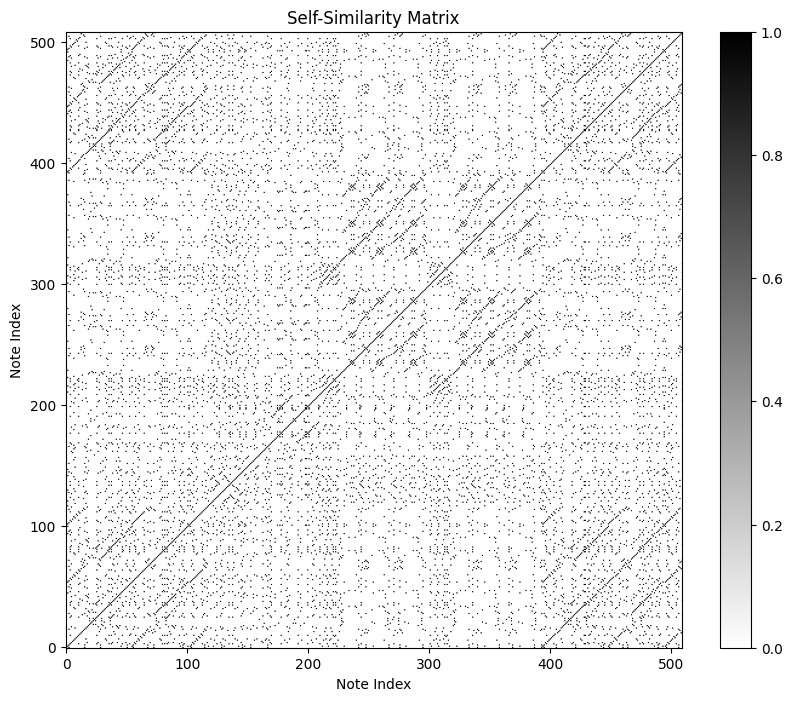

In [1]:
import mido
import numpy as np
import matplotlib.pyplot as plt

# Function to extract notes from a MIDI file
def extract_notes(midi_file):
    mid = mido.MidiFile(midi_file)
    notes = []
    for i, track in enumerate(mid.tracks):
        for msg in track:
            if not msg.is_meta and msg.type == 'note_on' and msg.velocity > 0:
                notes.append(msg.note)
    return notes

# Function to create self-similarity matrix
def create_self_similarity_matrix(notes):
    n = len(notes)
    ssm = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            ssm[i, j] = 1 if notes[i] == notes[j] else 0
            
    return ssm

# Function to plot self-similarity matrix
def plot_self_similarity_matrix(ssm):
    plt.figure(figsize=(10, 8))
    plt.imshow(ssm, cmap='gray_r', origin='lower')
    plt.title('Self-Similarity Matrix')
    plt.xlabel('Note Index')
    plt.ylabel('Note Index')
    plt.colorbar()
    plt.show()

# Main execution
midi_file = "/import/c4dm-datasets/maestro-v3.0.0/2008/MIDI-Unprocessed_07_R2_2008_01-05_ORIG_MID--AUDIO_07_R2_2008_wav--2.midi"  # Update this path
notes = extract_notes(midi_file)
ssm = create_self_similarity_matrix(notes)
plot_self_similarity_matrix(ssm)


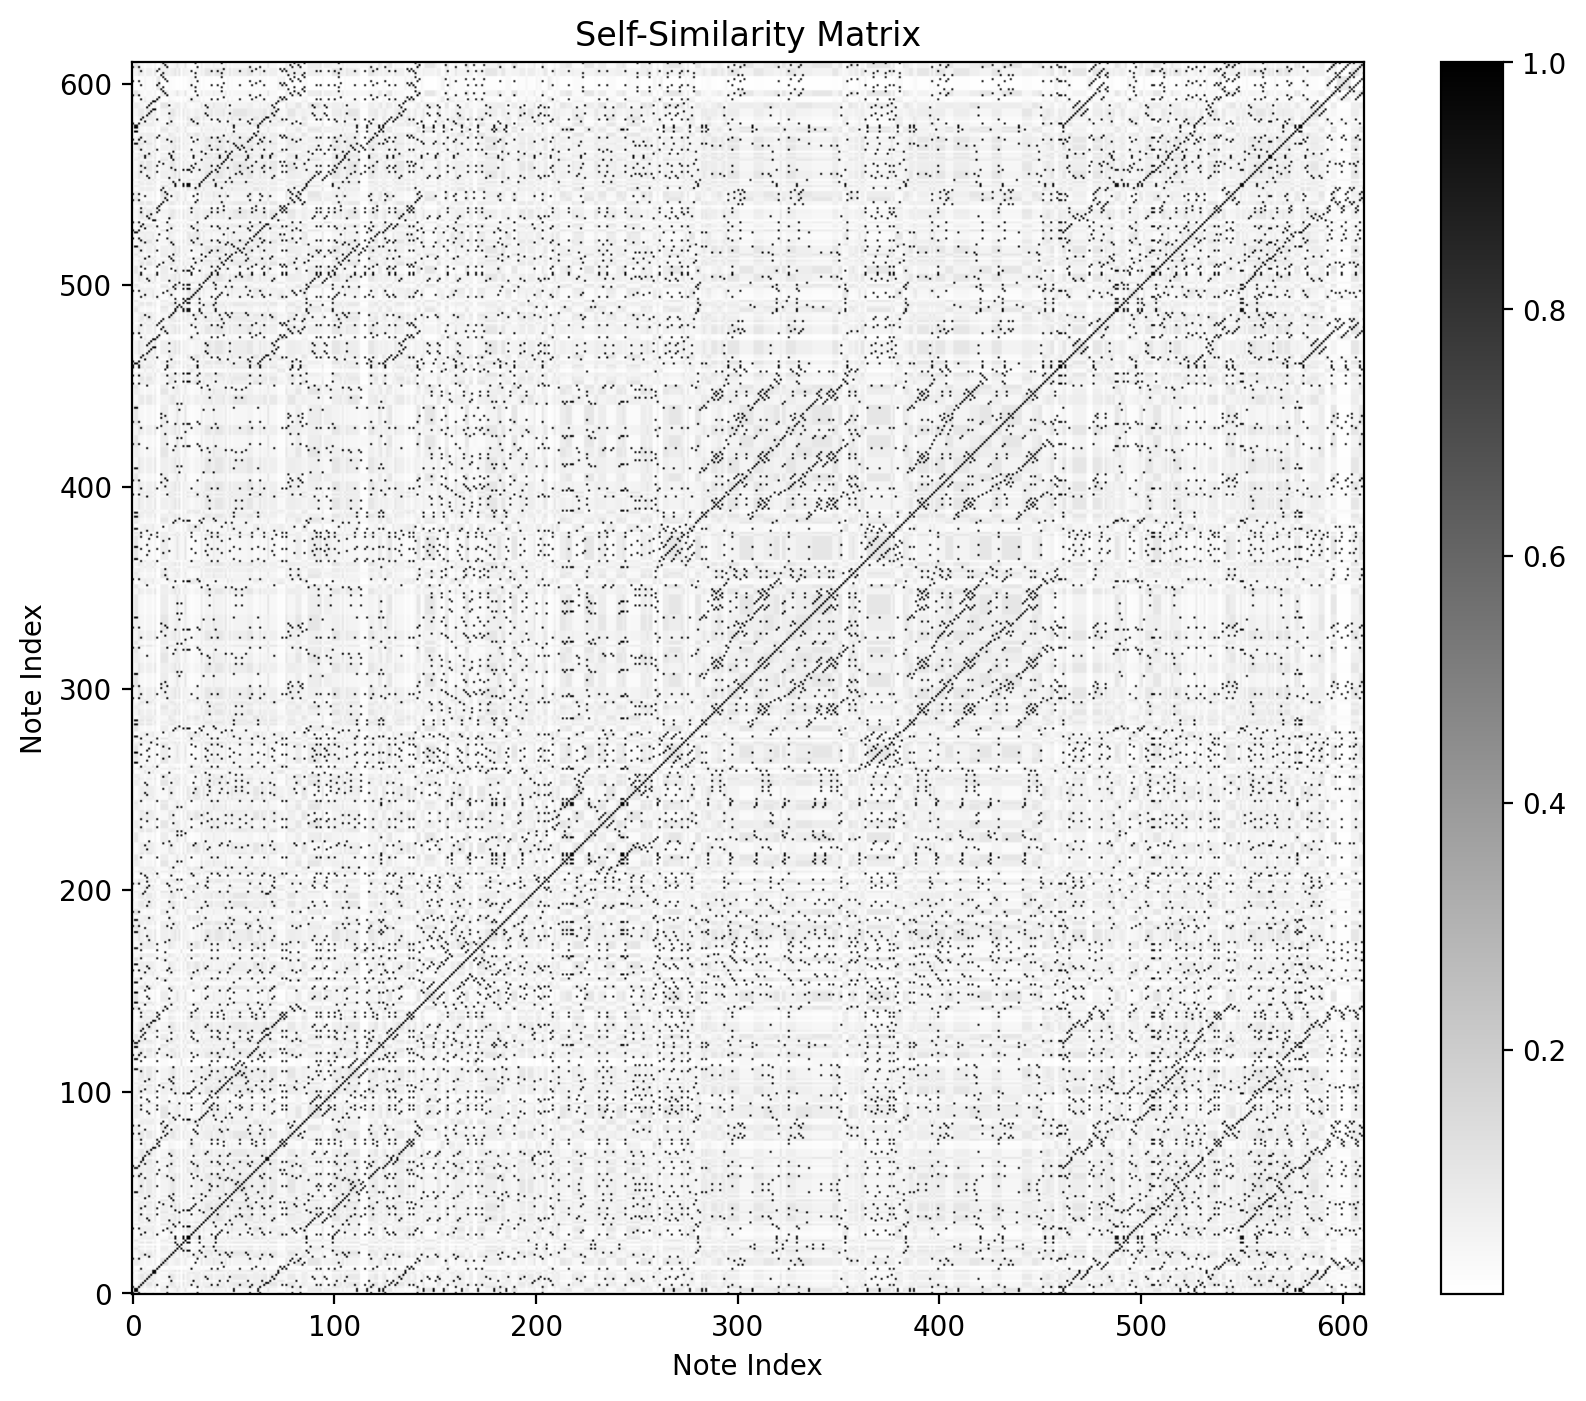

In [5]:
import mido
import numpy as np
import matplotlib.pyplot as plt
from music21 import converter, note, chord

def extract_notes(midi_file):
    midi_data = converter.parse(midi_file)
    notes = []
    for element in midi_data.flat.notes:
        if isinstance(element, note.Note):
            notes.append((element.pitch.midi, element.quarterLength))
        elif isinstance(element, chord.Chord):
            for pitch in element.pitches:
                notes.append((pitch.midi, element.quarterLength))
    return notes

# Function to calculate similarity between two notes based on pitch and duration
def note_similarity(note1, note2, alpha=0.5):
    pitch_similarity = 1 if note1[0] == note2[0] else 0
    if note1[1] == 0 or note2[1] == 0:
        duration_similarity = 0
    else:
        duration_similarity = 1 - abs(note1[1] - note2[1]) / max(note1[1], note2[1])
    return alpha * pitch_similarity + (1 - alpha) * duration_similarity

# Function to create self-similarity matrix using note similarities
def create_self_similarity_matrix(notes, alpha=0.5):
    n = len(notes)
    ssm = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            ssm[i, j] = note_similarity(notes[i], notes[j], alpha)
            
    return ssm

# Function to plot the self-similarity matrix
def plot_self_similarity_matrix(ssm):
    plt.figure(figsize=(10, 8))
    plt.imshow(ssm, cmap='gray_r', origin='lower')
    plt.title('Self-Similarity Matrix')
    plt.xlabel('Note Index')
    plt.ylabel('Note Index')
    plt.colorbar()
    plt.show()
    
# Main execution
midi_file = "/import/c4dm-datasets/maestro-v3.0.0/2008/MIDI-Unprocessed_07_R2_2008_01-05_ORIG_MID--AUDIO_07_R2_2008_wav--2.midi"  # Update this path
notes = extract_notes(midi_file)
ssm = create_self_similarity_matrix(notes, alpha=0.9)
plot_self_similarity_matrix(ssm)


In [10]:
notes

[(63, 1.75),
 (64, 0.25),
 (64, 0.25),
 (63, 0.5),
 (68, 0.75),
 (62, 0.75),
 (71, Fraction(5, 3)),
 (61, 0.75),
 (70, 0.75),
 (67, 0.75),
 (39, 1.5),
 (39, 0.5),
 (68, 3.25),
 (44, 3.75),
 (51, Fraction(1, 3)),
 (56, Fraction(1, 3)),
 (59, Fraction(1, 3)),
 (63, Fraction(1, 3)),
 (70, 1.0),
 (71, 0.75),
 (73, Fraction(2, 3)),
 (75, 0.5),
 (78, 0.25),
 (76, 0.5),
 (78, Fraction(1, 12)),
 (75, 0.75),
 (80, 0.25),
 (75, 1.0),
 (75, 1.25),
 (68, 2.0),
 (71, 1.5),
 (56, 1.0),
 (63, 1.0),
 (75, 1.25),
 (73, Fraction(1, 3)),
 (76, 1.0),
 (70, 0.5),
 (61, 0.5),
 (49, 0.5),
 (68, Fraction(2, 3)),
 (76, Fraction(1, 3)),
 (75, 0.5),
 (68, 0.5),
 (71, 0.5),
 (56, 0.5),
 (44, Fraction(2, 3)),
 (73, Fraction(1, 3)),
 (71, 1.25),
 (70, 0.5),
 (73, 1.0),
 (64, Fraction(2, 3)),
 (49, Fraction(2, 3)),
 (37, Fraction(2, 3)),
 (68, Fraction(2, 3)),
 (49, Fraction(2, 3)),
 (37, Fraction(2, 3)),
 (73, Fraction(2, 3)),
 (71, 0.5),
 (63, 0.5),
 (68, 0.5),
 (32, 1.0),
 (44, 1.0),
 (64, 1.0),
 (63, 0.5),
 (71,